<a href="https://colab.research.google.com/github/Narendra-Singh-shekhawat/ANN-and-deeplearning/blob/master/neural_networks_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

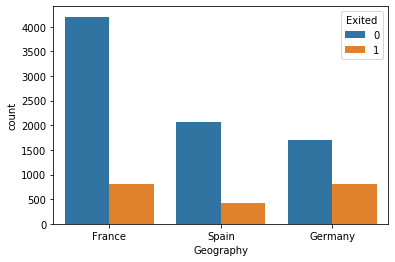

In [ ]:
sns.countplot(data["Geography"],hue=data["Exited"])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
la_1 = LabelEncoder()
data["Geography"]=la_1.fit_transform(data["Geography"])

In [ ]:
la_2=LabelEncoder()
data["Gender"]=la_2.fit_transform(data["Gender"])

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data["Geography"].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [ ]:
dummy=pd.get_dummies(data["Geography"])

In [ ]:
data=pd.concat([data,dummy],axis=1)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
X=data.drop(["RowNumber","CustomerId","Exited","Surname","Geography",2],axis=1)
y=data["Exited"]

In [ ]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,0,1
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Dense(units= 6 , kernel_initializer="uniform" ,activation="relu",input_dim=11))

In [ ]:
classifier.add(Dropout(p=0.1))

In [ ]:
classifier.add(Dense(units= 6 , kernel_initializer="uniform" ,activation="relu"))

In [ ]:
classifier.add(Dropout(p=0.1))

In [ ]:
classifier.add(Dense(units= 1 , kernel_initializer="uniform" ,activation="sigmoid"))

In [ ]:
classifier.compile(optimizer="adam" ,loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.5014 - acc: 0.7961
Epoch 2/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4355 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4324 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4325 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 136us/step - loss: 0.4314 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4307 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4332 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 1s 135us/step - loss: 0.4257 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4335 - acc: 0.7960
Epoch 10/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4309 - acc: 0.7960

In [ ]:
ypred=classifier.predict(X_test)

In [ ]:
ypred=(ypred>0.5)

In [ ]:
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,ypred)

In [ ]:
cm

array([[1503,   92],
       [ 189,  216]])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracy=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)
    

In [ ]:
accuracy.mean()

0.8386249947920442

In [ ]:
accuracy.std()

0.013091623910017221

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


Epoch 1/100
7200/7200 [==============================] - 1s 101us/step - loss: 0.5729 - acc: 0.7956
Epoch 2/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4413 - acc: 0.7971
Epoch 3/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4309 - acc: 0.7971
Epoch 4/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4258 - acc: 0.7971
Epoch 5/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4208 - acc: 0.8161
Epoch 6/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4162 - acc: 0.8285
Epoch 7/100
7200/7200 [==============================] - 0s 54us/step - loss: 0.4121 - acc: 0.8301
Epoch 8/100
7200/7200 [==============================] - 0s 51us/step - loss: 0.4091 - acc: 0.8335
Epoch 9/100
7200/7200 [==============================] - 0s 52us/step - loss: 0.4068 - acc: 0.8333
Epoch 10/100
7200/7200 [==============================] - 0s 53us/step - loss: 0.4048 - acc: 0.8350
Epoch 11

In [ ]:
best_parameters = grid_search.best_params_

NameError: ignored